In [3]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [4]:
california = fetch_california_housing()
x = pd.DataFrame(california.data,columns=california.feature_names)
y = pd.Series(california.target,name='Median_House_value')
x.head(),y.head()

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: Median_House_value, dtype: float64)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((14448, 8), (6192, 8))

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = model.predict(x_test)
list(zip(y_test[:5],y_pred[:5]))

[(0.477, np.float64(0.7260490726242566)),
 (0.458, np.float64(1.7674338262401648)),
 (5.00001, np.float64(2.710921611117648)),
 (2.186, np.float64(2.8351472702053755)),
 (2.78, np.float64(2.6069580654514724))]

In [10]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse = mean_squared_error(y_test,y_pred)
rse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("root mean squared error: ",rse)
print("r2 score ",r2)

root mean squared error:  0.7284008391515451
r2 score  0.5957702326061665


<function matplotlib.pyplot.show(close=None, block=None)>

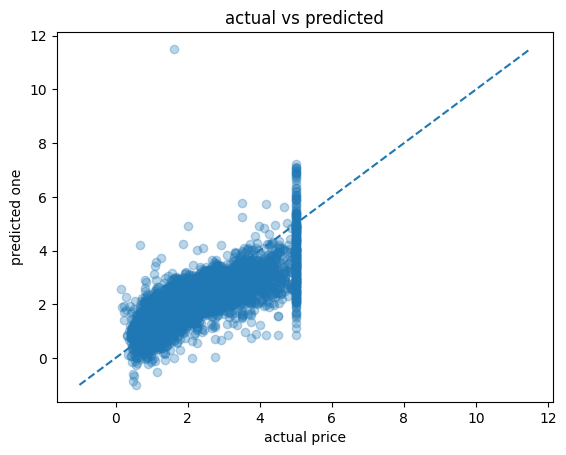

In [11]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,alpha=0.3)
plt.xlabel("actual price")
plt.ylabel("predicted one")
plt.title("actual vs predicted")

max_val=max(y_test.max(),y_pred.max())
min_val=min(y_test.min(),y_pred.min())
plt.plot([min_val,max_val],[min_val,max_val],'--')
plt.show